In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

In [2]:
def show(image):
  plt.figure(figsize=(20,10))
  plt.imshow(image, cmap='gray')

In [3]:
image = cv.imread('/content/drive/MyDrive/University/Computer Vision/references/aaa.png')

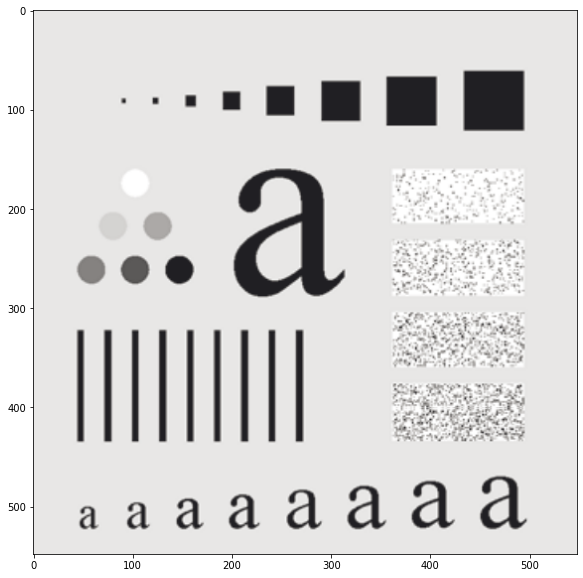

In [4]:
show(image)

In [5]:
image = image[:, :, 2]
image.shape

(548, 548)

Фильтры

In [23]:
d0 = 30
n = 2

In [24]:
width, height = image.shape[:2]

d = np.zeros((width, height))

ideal_filter_low = np.zeros((width, height))
ideal_filter_high = np.zeros((width, height))

butterworth_low = np.zeros((width, height))
butterworth_high = np.zeros((width, height))

gaussian_low = np.zeros((width, height))
gaussian_high = np.zeros((width, height))

for u in range(height):
  for v in range(width):
    d[u][v] = ((u - width / 2) ** 2 + (v - height / 2) ** 2) ** 0.5
    # low filters
    ideal_filter_low[u][v] = int(d[u][v] <= d0)
    butterworth_low[u][v] = 1 / ((1 +d[u][v] / d0) ** (2 * n))
    gaussian_low[u][v] = math.exp(-(d[u][v] * d[u][v]) / (2 * d0 * d0))
    # high filters
    ideal_filter_high[u][v] = int(d[u][v] > d0)
    if d[u][v] != 0:
      butterworth_high[u][v] = 1 / ((1 +d0 / d[u][v]) ** (2 * n))
    else:
      butterworth_high[u][v] = 0
    gaussian_high[u][v] = 1 - gaussian_low[u][v]

Спектр

In [25]:
spectrum = np.fft.fftshift(np.fft.fft2(image))
spectrum_log = np.log(np.abs(spectrum))

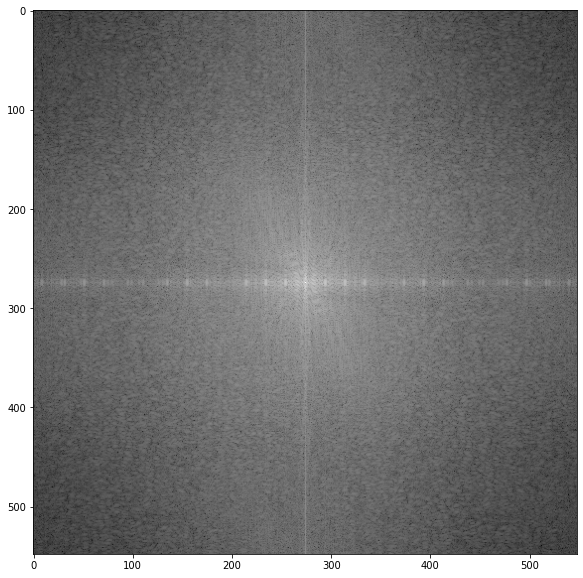

In [30]:
show(spectrum_log)

Идеальный фильтр

Низкочастотный

In [37]:
ideal_filter_low_fft = ideal_filter_low * spectrum
spectrum_ideal_filter_low = ideal_filter_low * spectrum_log
result_ideal_filter_low_spectrum = np.fft.ifft2(np.fft.ifftshift(ideal_filter_low_fft))
result_ideal_filter_low_spectrum = np.abs(result_ideal_filter_low_spectrum)

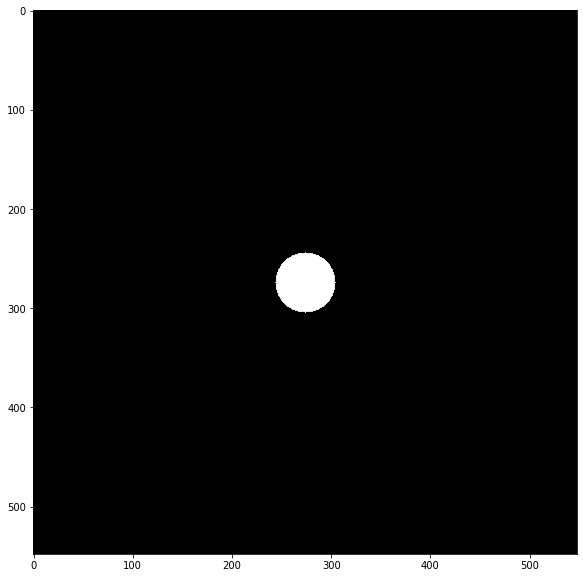

In [38]:
show(ideal_filter_low)

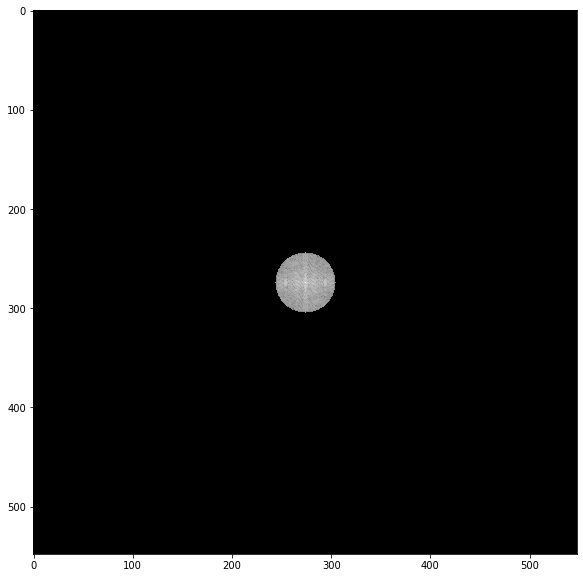

In [39]:
show(spectrum_ideal_filter_low)

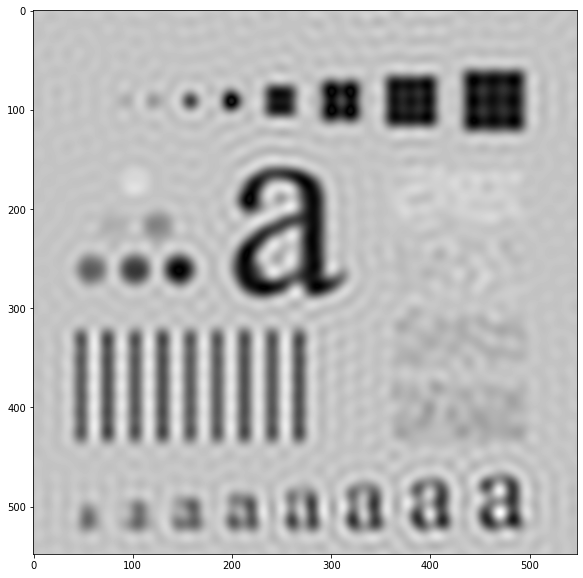

In [33]:
show(result_ideal_filter_low_spectrum)

Высокочастотный

In [41]:
ideal_filter_high_fft = ideal_filter_high * spectrum
spectrum_ideal_filter_high = ideal_filter_high * spectrum_log
result_ideal_filter_high_spectrum = np.fft.ifft2(np.fft.ifftshift(ideal_filter_high_fft))
result_ideal_filter_high_spectrum = np.abs(result_ideal_filter_high_spectrum)

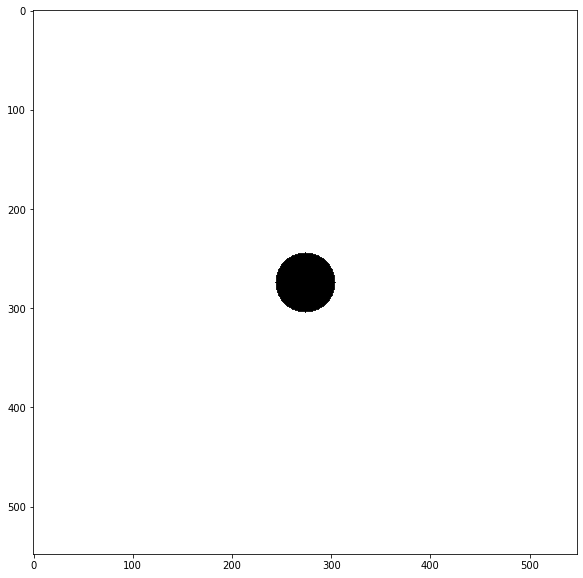

In [36]:
show(ideal_filter_high)

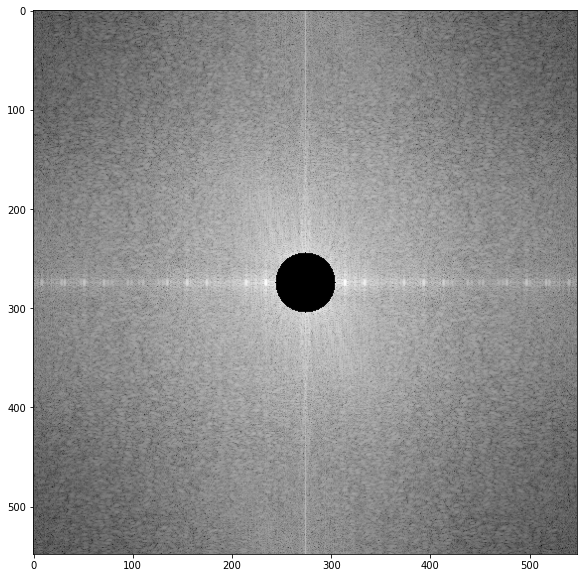

In [42]:
show(spectrum_ideal_filter_high)

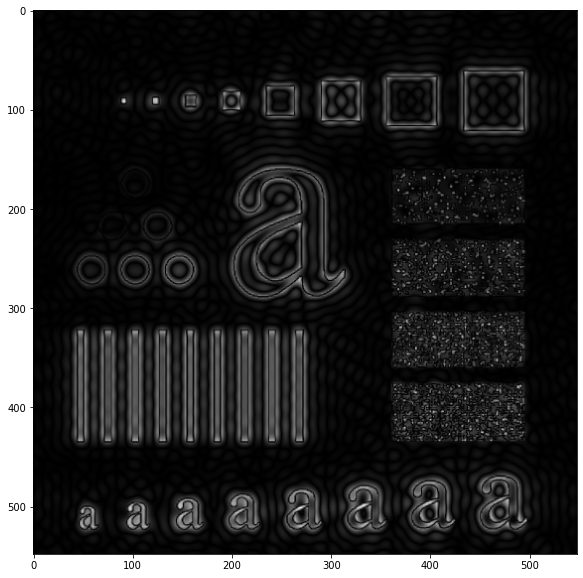

In [43]:
show(result_ideal_filter_high_spectrum)

Баттерворт

Низкочастотный

In [44]:
butterworth_low_fft = butterworth_low * spectrum
spectrum_butterworth_low = (butterworth_low * spectrum_log) ** 0.4
result_butterworth_low_spectrum = np.fft.ifft2(np.fft.ifftshift(butterworth_low_fft))
result_butterworth_low_spectrum = np.abs(result_butterworth_low_spectrum)

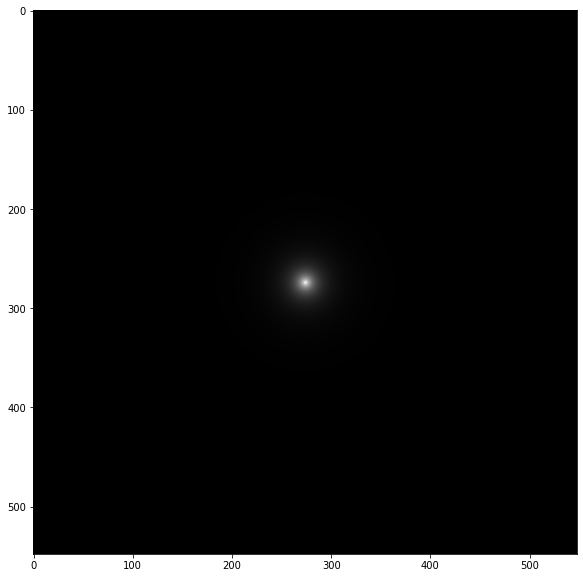

In [45]:
show(butterworth_low)

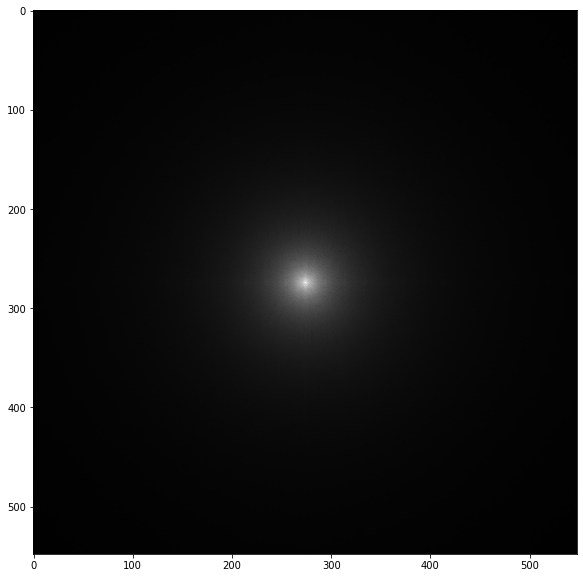

In [46]:
show(spectrum_butterworth_low)

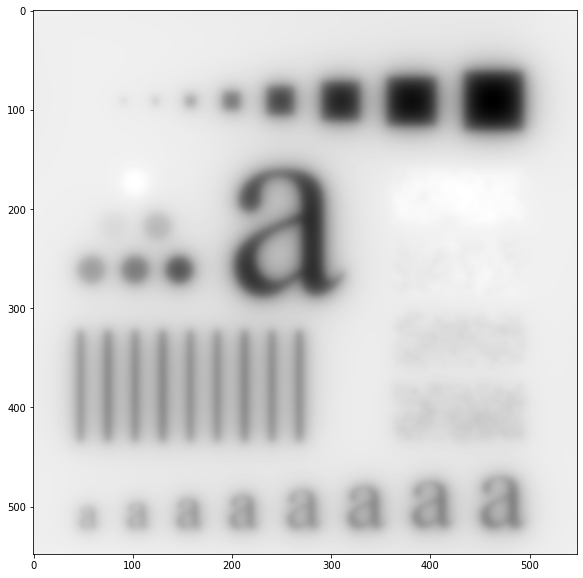

In [47]:
show(result_butterworth_low_spectrum)

Высокочастотный

In [48]:
butterworth_high_fft = butterworth_high * spectrum
spectrum_butterworth_high = (butterworth_high * spectrum_log) ** 0.4
result_butterworth_high_spectrum = np.fft.ifft2(np.fft.ifftshift(butterworth_high_fft))
result_butterworth_high_spectrum = np.abs(result_butterworth_high_spectrum)

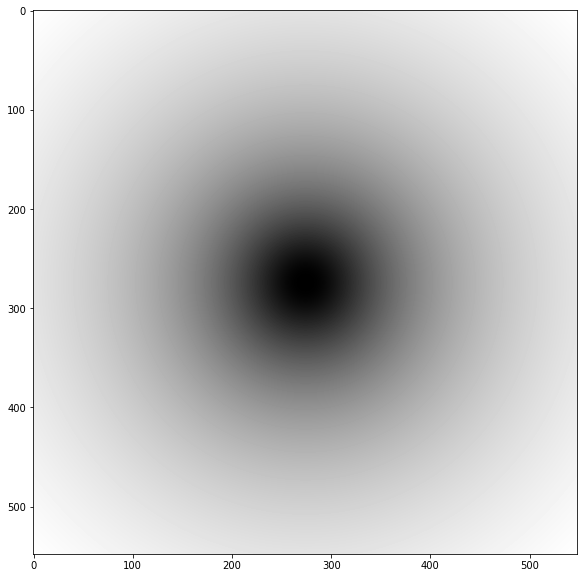

In [49]:
show(butterworth_high)

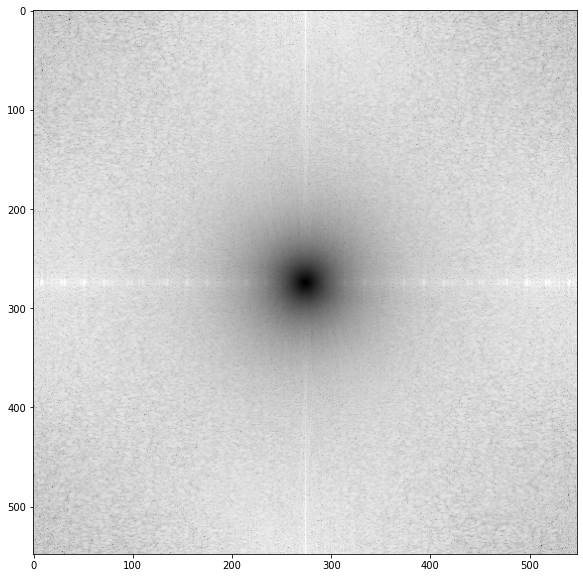

In [50]:
show(spectrum_butterworth_high)

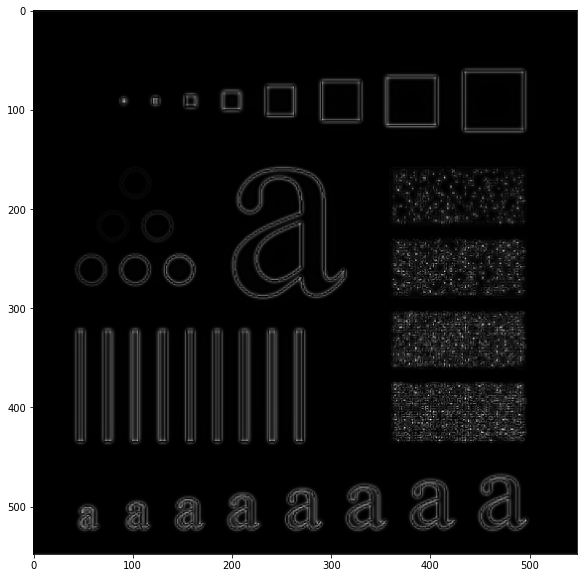

In [51]:
show(result_butterworth_high_spectrum)

Гауссовский

Низкочастотный

In [52]:
gaussian_low_fft = gaussian_low * spectrum
spectrum_gaussian_low = (gaussian_low * spectrum_log) ** 0.5
result_gaussian_low_spectrum = np.fft.ifft2(np.fft.ifftshift(gaussian_low_fft))
result_gaussian_low_spectrum = np.abs(result_gaussian_low_spectrum)

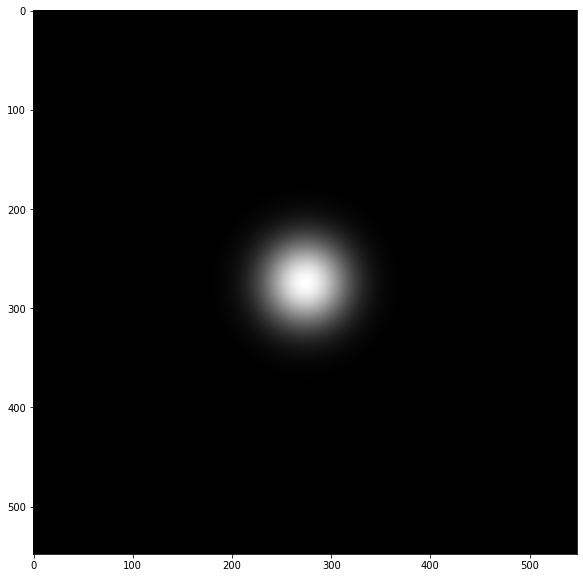

In [53]:
show(gaussian_low)

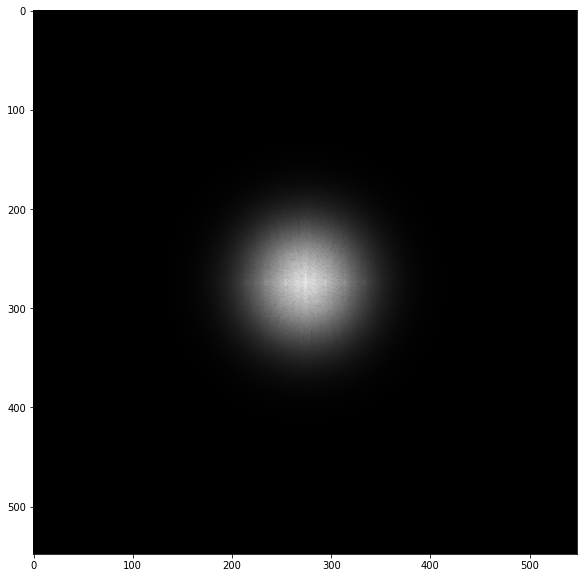

In [54]:
show(spectrum_gaussian_low)

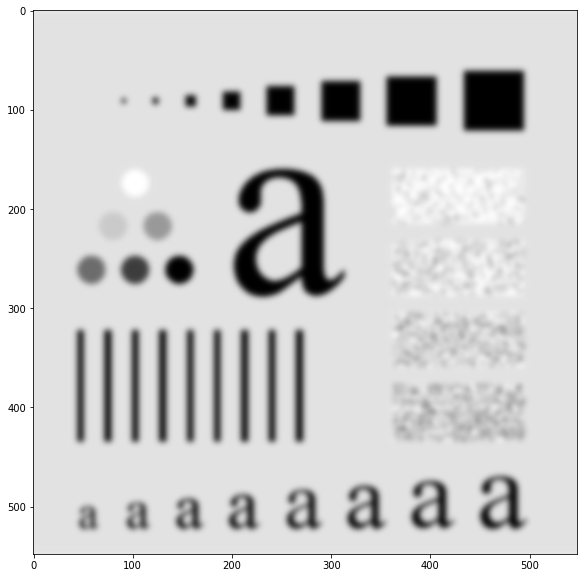

In [55]:
show(result_gaussian_low_spectrum)

Высокочастотный

In [56]:
gaussian_high_fft = gaussian_high * spectrum
spectrum_gaussian_high = (gaussian_high * spectrum_log) ** 0.5
result_gaussian_high_spectrum = np.fft.ifft2(np.fft.ifftshift(gaussian_high_fft))
result_gaussian_high_spectrum = np.abs(result_gaussian_high_spectrum)

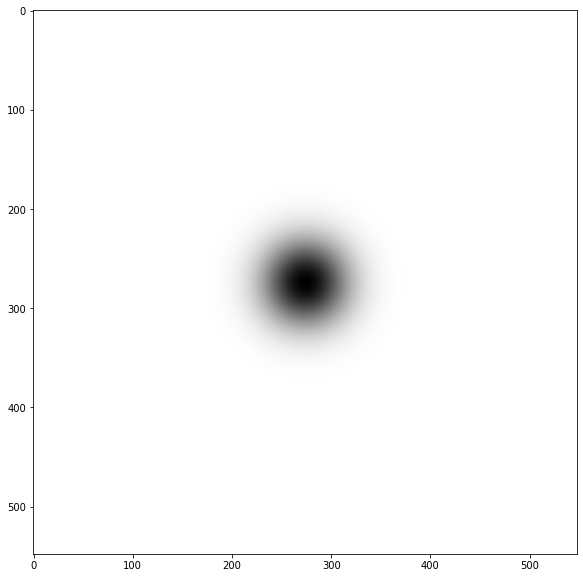

In [57]:
show(gaussian_high)

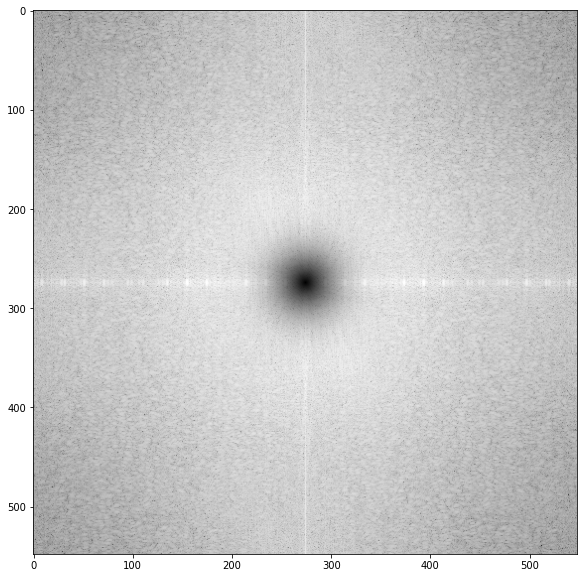

In [58]:
show(spectrum_gaussian_high)

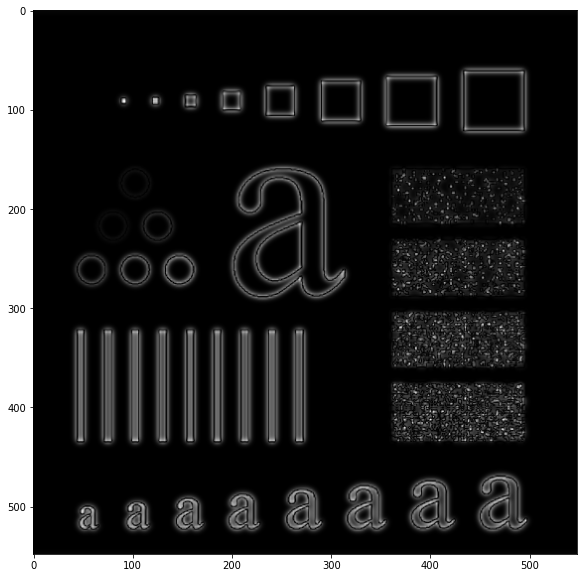

In [59]:
show(result_gaussian_high_spectrum)